In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime, time

In [7]:
coc=pd.read_csv("D:/Excelr Solutions/Data Science/Assiments/16.Forecasting/CocaColaSalesRawdata.csv")

In [8]:
coc.head(10).T

,0,1,2,3,4,5,6,7,8,9
Quarter,Q1_86,Q2_86,Q3_86,Q4_86,Q1_87,Q2_87,Q3_87,Q4_87,Q1_88,Q2_88
Sales,1734.827,2244.960999,2533.804993,2154.962997,1547.818996,2104.411995,2014.362999,1991.746998,1869.049999,2313.631996


In [9]:
coc.info

<bound method DataFrame.info of    Quarter        Sales
0    Q1_86  1734.827000
1    Q2_86  2244.960999
2    Q3_86  2533.804993
3    Q4_86  2154.962997
4    Q1_87  1547.818996
5    Q2_87  2104.411995
6    Q3_87  2014.362999
7    Q4_87  1991.746998
8    Q1_88  1869.049999
9    Q2_88  2313.631996
10   Q3_88  2128.320000
11   Q4_88  2026.828999
12   Q1_89  1910.603996
13   Q2_89  2331.164993
14   Q3_89  2206.549995
15   Q4_89  2173.967995
16   Q1_90  2148.278000
17   Q2_90  2739.307999
18   Q3_90  2792.753998
19   Q4_90  2556.009995
20   Q1_91  2480.973999
21   Q2_91  3039.522995
22   Q3_91  3172.115997
23   Q4_91  2879.000999
24   Q1_92  2772.000000
25   Q2_92  3550.000000
26   Q3_92  3508.000000
27   Q4_92  3243.859993
28   Q1_93  3056.000000
29   Q2_93  3899.000000
30   Q3_93  3629.000000
31   Q4_93  3373.000000
32   Q1_94  3352.000000
33   Q2_94  4342.000000
34   Q3_94  4461.000000
35   Q4_94  4017.000000
36   Q1_95  3854.000000
37   Q2_95  4936.000000
38   Q3_95  4895.000000
39   Q4_

In [11]:
coc.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [12]:
coc.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

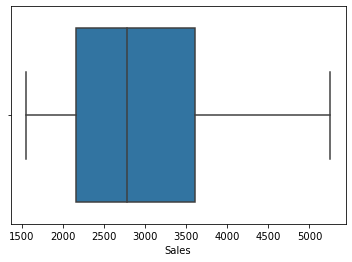

In [13]:
sns.boxplot("Sales",data=coc)

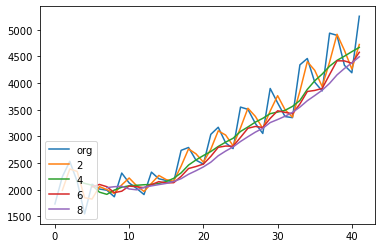

In [14]:
coc.Sales.plot(label="org")
for i in range(2,10,2):
    coc["Sales"].rolling(i).mean().plot(label=str(i))
    plt.legend(loc=3)

C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


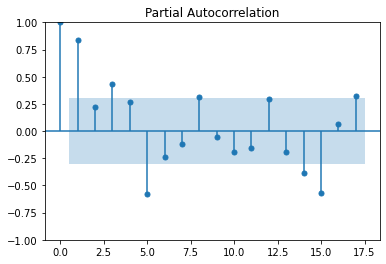

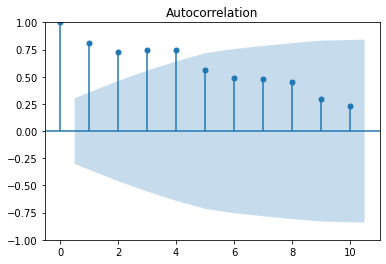

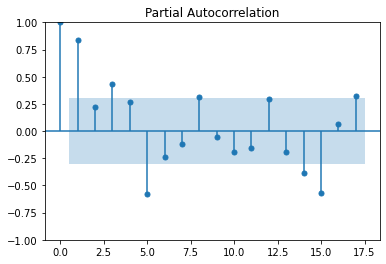

In [16]:
tsa_plots.plot_acf(coc.Sales,lags=10)
tsa_plots.plot_pacf(coc.Sales)

In [20]:
Train=coc.head(48)
Test=coc.tail(12)

In [21]:
def MAPE(pred,org):
    temp=np.abs((pred-org))*100/org
    return np.mean(temp)

In [27]:
ses_model =SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses=ses_model.predict(start =Test.index[0],end=Test.index[-1])
MAPE(pred_ses,Test.Sales)

9.682004926517115

In [31]:
hw_model =Holt(Train["Sales"]).fit()
pred_hw= hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)
                          

11.025174749794253

In [32]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

C:\Users\Aditya\AppData\Local\Temp\ipykernel_5676\1311508392.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()


3.4316432679813946

In [33]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

2.8697130059034066

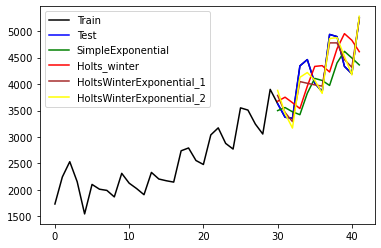

In [38]:
plt.plot(Train.index, Train["Sales"], label='Train',color="black")
plt.plot(Test.index, Test["Sales"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')